# Práctica Machine Learning

#### Autor: Ramón-Armand Laborda Moreu

El objetivo de la práctica consiste en la búsqueda de un modelo óptimo que pueda estimar el precio de una vivienda con la suficiente precisión cumpliendo las principales asunciones estadísticas. El dataset es el resultado de un scraping a la web de Airbnb. A grandes rasgos se pretende cubrir los siguientes puntos centrados en un problema de regresión.

1. Preparación de datos
2. Análisis exploratorio
3. Preprocesamiento de datos
4. Modelado
5. Conclusión

#### 1. Preparación de datos

In [3]:
import pandas as pd

# Cargamos fichero csv y almacenamos en pandas df
airbnb = pd.read_csv(r'data/airbnb-listings-extract.csv', sep=';')

Una vez cargado el dataset y previo a separar en dos muestras (train y test) visualizamos una muestra de los datos así como la estructura general para detectar cual es la variable dependiente (objeto de estudio) y las independientes. Si es necesario eliminamos variables que carezcan de información general u observaciones no etiquetadas de la variable dependiente.

In [4]:
airbnb.head(7)

,ID,Listing Url,Scrape ID,Last Scraped,Name,Summary,Space,Description,Experiences Offered,Neighborhood Overview,...,Review Scores Communication,Review Scores Location,Review Scores Value,License,Jurisdiction Names,Cancellation Policy,Calculated host listings count,Reviews per Month,Geolocation,Features
0,11210388,https://www.airbnb.com/rooms/11210388,20170306202425,2017-03-07,The Loft-Full Bath-Deck w/View,Loft in the Hill country 12-15 minutes directl...,This loft has a spectacular view of the hills ...,Loft in the Hill country 12-15 minutes directl...,none,This neighborhood is located in the hills west...,...,10.0,10.0,10.0,NaN,NaN,moderate,1.0,3.50,"30.3373609355,-97.8632766782","Host Is Superhost,Host Has Profile Pic,Host Id..."
1,17471131,https://www.airbnb.com/rooms/17471131,20170407214050,2017-04-08,"Claris I, Friendly Rentals","This apartment has: 1 double bed, 1 double sof...","This apartment has: 1 double bed, 1 double sof...","This apartment has: 1 double bed, 1 double sof...",none,Plaza Cataluña Catalonia Square is the large...,...,10.0,8.0,10.0,HUTB-006721,NaN,super_strict_30,106.0,0.86,"41.3896829422,2.17262543017","Host Has Profile Pic,Requires License,Instant ..."
2,17584891,https://www.airbnb.com/rooms/17584891,20170407214050,2017-04-08,"Style Terrace Red, Friendly Rentals","This apartment has: 1 double bed, 1 double sof...","This apartment has: 1 double bed, 1 double sof...","This apartment has: 1 double bed, 1 double sof...",none,Plaza Cataluña Catalonia Square is the large...,...,NaN,NaN,NaN,HUTB-007527,NaN,super_strict_30,106.0,NaN,"41.3930345489,2.16217327868","Host Has Profile Pic,Requires License,Instant ..."
3,5398030,https://www.airbnb.com/rooms/5398030,20170407214050,2017-04-08,Picasso Suite 1.4 Paseo de Gracia,Live like a local in Barcelona's most chic dis...,You wake up to the sun rising over Barcelona's...,Live like a local in Barcelona's most chic dis...,none,We're right in the heart of the chic L'Eixampl...,...,10.0,10.0,9.0,NaN,NaN,strict,24.0,1.09,"41.3969668101,2.1674178103","Host Has Profile Pic,Host Identity Verified,Re..."
4,18104606,https://www.airbnb.com/rooms/18104606,20170407214050,2017-04-08,Smart City Centre Apartment II,"Unique apartment in vibrant neighborhoods, car...","License: HUTB-005313 Charming apartment, locat...","Unique apartment in vibrant neighborhoods, car...",none,NaN,...,NaN,NaN,NaN,NaN,NaN,flexible,92.0,NaN,"41.3886851936,2.15514963616","Host Has Profile Pic,Host Identity Verified,Is..."
5,15695269,https://www.airbnb.com/rooms/15695269,20170407214050,2017-04-08,55. Valencia II Apartment,"Unique apartment in vibrant neighborhoods, car...",This fully refurbished apartment has 2 bedroom...,"Unique apartment in vibrant neighborhoods, car...",none,NaN,...,NaN,NaN,NaN,NaN,NaN,strict,92.0,NaN,"41.3825366724,2.14957707323","Host Has Profile Pic,Host Identity Verified,Is..."
6,1295958,https://www.airbnb.com/rooms/1295958,20170407214050,2017-04-08,3 BR + 2 baths near the beach!!,Spacious and quiet apartment that can accommod...,Its size allows to accommodate up to 6 people ...,Spacious and quiet apartment that can accommod...,none,"This unique area is rich in history, architect...",...,10.0,9.0,9.0,HUTB-0077039-0,NaN,strict,1.0,1.22,"41.3990576554,2.18422942312","Host Has Profile Pic,Is Location Exact,Require..."


In [5]:
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14780 entries, 0 to 14779
Data columns (total 89 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ID                              14780 non-null  int64  
 1   Listing Url                     14780 non-null  object 
 2   Scrape ID                       14780 non-null  int64  
 3   Last Scraped                    14780 non-null  object 
 4   Name                            14779 non-null  object 
 5   Summary                         14189 non-null  object 
 6   Space                           10888 non-null  object 
 7   Description                     14774 non-null  object 
 8   Experiences Offered             14780 non-null  object 
 9   Neighborhood Overview           9134 non-null   object 
 10  Notes                           5644 non-null   object 
 11  Transit                         9066 non-null   object 
 12  Access                          

In [6]:
# Listado de variables que carecen de interés para el estudio
del_columns = ['Listing Url', 'Scrape ID', 'Last Scraped', 'Name', 'Summary', 'Space', 'Description', 'Experiences Offered', 'Neighborhood Overview', 'Notes', 'Transit', 'Access', 'Interaction', 'House Rules', 'Thumbnail Url', 'Medium Url', 'Picture Url', 'XL Picture Url', 'Host ID', 'Host URL', 'Host Name', 'Host Since', 'Host About', 'Host Acceptance Rate', 'Host Thumbnail Url', 'Host Picture Url', 'Host Verifications', 'Street', 'Neighbourhood', 'Neighbourhood Group Cleansed', 'City', 'State', 'Zipcode', 'Market', 'Smart Location', 'Country Code', 'Country', 'Weekly Price', 'Monthly Price', 'Calendar Updated', 'Has Availability', 'Calendar last Scraped', 'First Review', 'Last Review', 'License', 'Jurisdiction Names']

El criterio para decidir si una variable carece de interés es subjetivo pero por lo general han sido seleccionadas todas las columnas que:
- Contengan url's
- Campos descriptivos del que no se piense hacer un análisis de NLP (la idea es estimar el precio con la mayor objetividad posible y cada host añade descriptivos que pueden distorsionar la realidad)
- Id's secundarios (mantenemos en los datos la columna ID por si hubiese que recuperar algún dato)
- Fechas referentes al método de estracción de datos
- Nombres y cualidades del host
- Columnas referentes a la dirección (excluyendo longitud y latitud)
- Fechas de reseñas
- Columnas con todos los datos missing (aun no se ha realizado ninguna función pero en el data wrangler usado como visor aparece por defecto el número total de valores faltantes y distintos)
- Otras columnas de Precios que son agregados del precio diario y presentaran a priori una alta correlación (presentaban muchos valores nulos)
- Número de Licencia y nombre de Jurisdicción

In [7]:
airbnb_col_fil = airbnb.drop(del_columns, axis =1)

In [8]:
print("Primer df:  ", airbnb.shape, "\n" + "Segundo df: ", airbnb_col_fil.shape)
# Hemos reducido más de la mitad del número de columnas (46)

Primer df:   (14780, 89) 
Segundo df:  (14780, 43)


Para mitigar cualquier selección de las muestras train y test con observaciones cuya variable de estudio sea nula, filtramos el dataframe. No queremos observaciones que no estén etiquetadas ya que los métodos que usaremos en el futuro requieren de dicha información para poder medir el error.

In [9]:
airbnb_row_fil = airbnb_col_fil[~airbnb_col_fil['Price'].isnull()]

In [10]:
print("Primer df:  ", airbnb_col_fil.shape, "\n" + "Segundo df: ", airbnb_row_fil.shape)
# Hemos eliminado 7 observaciones carentes de Precio

Primer df:   (14780, 43) 
Segundo df:  (14763, 43)


Ahora ya podemos dividir nuestra muestra de Airbnb en 2 sub muestras train con la que entrenaremos el modelo y test con la que evaluaremos como desempeña

In [11]:
import sklearn
from sklearn.model_selection import train_test_split

train, test = train_test_split(airbnb_row_fil, test_size = 0.3, shuffle = True, random_state = 420)

print(f'Dimensiones del dataset de training: {train.shape}, proporción de {(train.shape[0]/airbnb_row_fil.shape[0])*100:.0f}%')
print(f'Dimensiones del dataset de test: {test.shape}, proporción de {(test.shape[0]/airbnb_row_fil.shape[0])*100:.0f}%')

# Guardamos ambos ficheros aunque hemos especificado una semilla en el random_state
train.to_csv(r'data/airbnb_train.csv', sep=';', decimal='.', index=False)
test.to_csv(r'data/airbnb_test.csv', sep=';', decimal='.', index=False)

Dimensiones del dataset de training: (10334, 43), proporción de 70%
Dimensiones del dataset de test: (4429, 43), proporción de 30%


#### 2. Análisis Exploratorio

El análisis exploratorio servirá para realizar un procesamiento de datos que limpie y depure todo lo necesario. También ayudará a entender la naturaleza y distribución de los datos para determinar que modelo se adapta mejor.

In [12]:
train.describe()

,ID,Host Response Rate,Host Listings Count,Host Total Listings Count,Latitude,Longitude,Accommodates,Bathrooms,Bedrooms,Beds,...,Number of Reviews,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,Calculated host listings count,Reviews per Month
count,1.033400e+04,9012.000000,10332.000000,10332.000000,10334.000000,10334.000000,10334.000000,10300.000000,10318.000000,10307.000000,...,10334.000000,8037.000000,8020.000000,8024.000000,8011.000000,8025.000000,8009.000000,8008.000000,10331.000000,8148.000000
mean,1.028419e+07,94.963160,12.445993,12.445993,40.505776,-3.910722,3.296787,1.285485,1.350746,2.061415,...,22.705825,91.769192,9.423940,9.338360,9.626514,9.648100,9.549757,9.225400,9.489110,1.864948
std,5.559048e+06,14.825346,33.849160,33.849160,4.495461,14.015642,2.109615,0.661582,0.908195,1.631491,...,38.366503,8.886800,0.910553,0.968039,0.789011,0.762748,0.763525,0.939546,23.598028,1.868944
min,1.862800e+04,0.000000,0.000000,0.000000,-37.851182,-123.131344,1.000000,0.000000,0.000000,1.000000,...,0.000000,20.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,0.020000
25%,5.615668e+06,100.000000,1.000000,1.000000,40.409917,-3.707628,2.000000,1.000000,1.000000,1.000000,...,1.000000,89.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,1.000000,0.450000
50%,1.136236e+07,100.000000,2.000000,2.000000,40.419722,-3.700665,3.000000,1.000000,1.000000,2.000000,...,7.000000,94.000000,10.000000,10.000000,10.000000,10.000000,10.000000,9.000000,2.000000,1.200000
75%,1.531121e+07,100.000000,6.000000,6.000000,40.430972,-3.683676,4.000000,1.000000,2.000000,2.000000,...,27.000000,98.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,5.000000,2.740000
max,1.858361e+07,100.000000,519.000000,519.000000,55.966912,153.371427,16.000000,8.000000,10.000000,16.000000,...,446.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,145.000000,17.210000


In [13]:
train.isnull().any()

ID                                False
Host Location                      True
Host Response Time                 True
Host Response Rate                 True
Host Neighbourhood                 True
Host Listings Count                True
Host Total Listings Count          True
Neighbourhood Cleansed            False
Latitude                          False
Longitude                         False
Property Type                     False
Room Type                         False
Accommodates                      False
Bathrooms                          True
Bedrooms                           True
Beds                               True
Bed Type                          False
Amenities                          True
Square Feet                        True
Price                             False
Security Deposit                   True
Cleaning Fee                       True
Guests Included                   False
Extra People                      False
Minimum Nights                    False


Solo con las dos instrucciones anteriores nos damos cuenta que todavía tenemos un gran número de variables (podemos abrir el output en un editor de texto pero en el log queda truncado). Lo ideal y como procedemos será analizar por grupos de variables homogeneas. Las compararemos entre sí y con el objeto de estudio.

In [14]:
# Variables relacionadas con el Host
val_host = ['Host Location', 'Host Response Time', 'Host Response Rate', 'Host Neighbourhood', 'Host Listings Count', 'Host Total Listings Count', 'Calculated host listings count']
len(val_host)

7

In [15]:
# Variables relacionadas con la dirección
val_dir = ['Neighbourhood Cleansed', 'Latitude', 'Longitude', 'Geolocation']
len(val_dir)

4

In [16]:
# Variables relacionadas con características físicas del Airbnb
val_air = ['Property Type', 'Room Type', 'Accommodates', 'Bathrooms', 'Bedrooms', 'Beds', 'Bed Type', 'Amenities', 'Square Feet']
len(val_air)

9

In [17]:
# Variables relacionadas con condiciones de alquiler del Airbnb
val_rent = ['Security Deposit', 'Cleaning Fee', 'Guests Included', 'Extra People', 'Minimum Nights', 'Maximum Nights', 'Availability 30', 'Availability 60', 'Availability 90', 'Availability 365', 'Cancellation Policy', 'Features']
len(val_rent)

12

In [18]:
# Variables Relacionadas con las reseñas
val_res = ['Number of Reviews', 'Review Scores Rating', 'Review Scores Accuracy', 'Review Scores Cleanliness', 'Review Scores Checkin', 'Review Scores Communication', 'Review Scores Location', 'Review Scores Value', 'Reviews per Month']
len(val_res)

9

In [19]:
# Comprobamos si todas las columnas se contemplan para el estudio
listas_comprobacion = val_host + val_dir + val_air + val_rent + val_res

for i in train.columns:
    if i not in listas_comprobacion:
        print(f"Falta incluir: {i}")

Falta incluir: ID
Falta incluir: Price


Tanto el ID como la variable objeto de estudio no las tendremos en cuenta para incluirlas en los subsets de columnas

In [20]:
len(train.columns) == 2 + len(val_host) + len(val_dir) + len(val_air) + len(val_rent) + len(val_res)

True

Antes de comenzar con el estudio de los distintos grupos de variables, creamos una función personalizada con los principales estadísticos igual que la función nativa de pandas.describe() pero añadiendo el número de valores nulos y la correlación con la primera columna que será el objeto de estudio. Con esto ahorraremos celdas. 

In [21]:
import numpy as np

def custom_descibre(df):

    # Solo columnas tipo numericas
    numeric_df = df.select_dtypes(include=[np.number])
    
    count = numeric_df.count()
    mean = numeric_df.mean()
    std = numeric_df.std()
    min_value = numeric_df.min()
    quantile_25 = numeric_df.quantile(0.25)
    median = numeric_df.median()
    quantile_75 = numeric_df.quantile(0.75)
    max_value = numeric_df.max()
    nulls = numeric_df.isnull().sum() 
    correlacion = numeric_df.corrwith(numeric_df.iloc[:, 0])
    
    stats_df = pd.DataFrame({
        'count': count,
        'mean': mean,
        'std': std,
        'min': min_value,
        '25%': quantile_25,
        '50%': median,
        '75%': quantile_75,
        'max': max_value,
        'nulls': nulls,
        'Corr': correlacion
    })
    
    return stats_df

#### 2.1 Variables relacionadas con el Host

In [22]:
train[['Price'] + val_host].head()

,Price,Host Location,Host Response Time,Host Response Rate,Host Neighbourhood,Host Listings Count,Host Total Listings Count,Calculated host listings count
13748,45.0,"Madrid, Community of Madrid, Spain",within a few hours,100.0,La Latina,1.0,1.0,1.0
9656,76.0,"Palma, Balearic Islands, Spain",within an hour,100.0,NaN,4.0,4.0,3.0
1379,50.0,"Madrid, Madrid, Spain",within an hour,100.0,Malasaña,11.0,11.0,11.0
11537,23.0,"Madrid, Community of Madrid, Spain",NaN,NaN,NaN,1.0,1.0,1.0
8021,56.0,"Madrid, Community of Madrid, Spain",within an hour,100.0,Embajadores,1.0,1.0,1.0


In [23]:
custom_descibre(train[['Price'] + val_host])

,count,mean,std,min,25%,50%,75%,max,nulls,Corr
Price,10334,73.834817,70.928807,9.0,35.0,56.0,89.0,969.0,0,1.000000
Host Response Rate,9012,94.963160,14.825346,0.0,100.0,100.0,100.0,100.0,1322,0.011738
Host Listings Count,10332,12.445993,33.849160,0.0,1.0,2.0,6.0,519.0,2,0.236560
Host Total Listings Count,10332,12.445993,33.849160,0.0,1.0,2.0,6.0,519.0,2,0.236560
Calculated host listings count,10331,9.489110,23.598028,1.0,1.0,2.0,5.0,145.0,3,0.234203


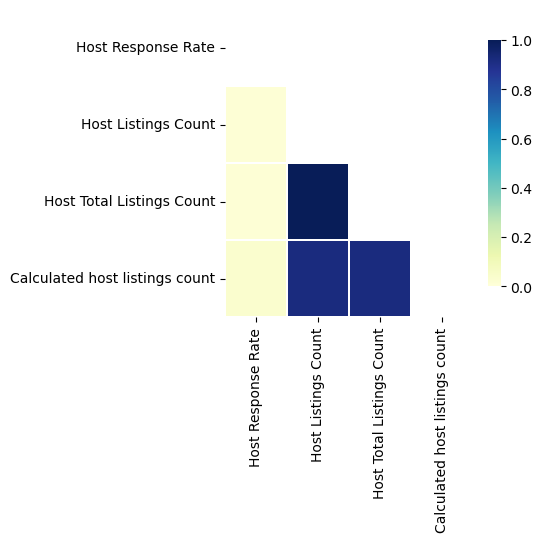

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
corr = np.abs(train[val_host].drop(['Host Location', 'Host Response Time', 'Host Neighbourhood'], axis=1).corr())

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(4, 4))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,vmin = 0.0, vmax=1.0, center=0.5,
            linewidths=.1, cmap="YlGnBu", cbar_kws={"shrink": .8})

plt.show()

In [27]:
train[['ID']+ val_host][['ID', 'Host Response Time']].groupby('Host Response Time', dropna = False).count()

,ID
Host Response Time,
a few days or more,201
within a day,1245
within a few hours,2013
within an hour,5553
NaN,1322


Las conclusiones tras observar los primeros estadísticos son:

* <u>**Host Location:**</u> Localización del Host en string carece de interés. Si fuese del apartamento se valoraría la codificación. Se puede eliminar la variable.
* <u>**Host Response Time:**</u> El tiempo que tarda el host en contestar tiene muchos valores nulos y prácticamente correlación cero con la variable de objeto de estudio. Se puede eliminar la variable.
* <u>**Host Response Rate:**</u> El tiempo que tarda el host en contestar es una variable categórica que podemos codificar para transformar en discreta.
* <u>**Host Neighbourhood:**</u> El vecindario del host en string carece de sentido igual que la dirección. Se puede eliminar la variable.
* <u>**Host Listings Count:**</u> El numero de Airbnb's que tiene un Host podría ser de interés. Observamos que de media un host tiene más de 12 airbnb's lo que hace pensar que hay algún host que desvirtua el estadístico. Viendo el cuartil 3 el 75% de los hosts tienen 6 o menos airbnb's.
* <u>**Host Total Listing Count:**</u> El color de la correlación es prácticamente 1 con la variable anterior por lo que podemos eliminar esta variable.
* <u>**Calculated host listings count:**</u> Correlación muy próxima a 1 y con 1 valor missing más con respecto a Host Listing Count. Es la misma variable pero depurada y corregida (no existe el valor atípico). Usaremos esta variable. Se puede eliminar la variable Host Listings Count.


#### 2.2 Variables relacionadas con la dirección

In [28]:
train[['Price'] + val_dir].head()

,Price,Neighbourhood Cleansed,Latitude,Longitude,Geolocation
13748,45.0,Embajadores,40.406915,-3.705853,"40.4069146026,-3.70585340101"
9656,76.0,Palma de Mallorca,39.572762,2.647736,"39.5727620344,2.6477358056"
1379,50.0,Embajadores,40.407502,-3.699373,"40.4075017006,-3.69937311056"
11537,23.0,Acacias,40.396398,-3.706252,"40.3963977918,-3.70625235516"
8021,56.0,Embajadores,40.408940,-3.698995,"40.4089401144,-3.69899515645"


In [103]:
import folium
from folium.plugins import MarkerCluster

mapa = folium.Map(location=[40.406915, -3.705853],  zoom_start=3)

marker_cluster = MarkerCluster().add_to(mapa)

for i, row in train[val_dir][['Latitude','Longitude']].iterrows():
    folium.Marker(location=[row['Latitude'], row['Longitude']]).add_to(marker_cluster)

mapa

Tras el análisis exploratorio de los datos, observamos que el grueso de los Airbnb's se encuentra en España. Adicionalmente, la localización de un Airbnb es crucial y depende del precio. Por lo tanto:

* <u> **Neighbourhood Cleansed:** </u> Variable tipo string que habría que codificar. Descartaremos por el momento.
* <u> **Latitude:** </u> Mantenemos en el estudio para determinar el precio del Airbnb en conjunto con la longitud.
* <u> **Longitude:** </u> Mantenemos en el estudio para determinar el precio del Airbnb en conjunto con la latitud.
* <u> **Geolocation:** </u> Consiste en la concatenación de la longitud y latitud por lo que podemos descartar la variable.

#### 2.3 Variables relacionadas con características físicas del Airbnb

In [43]:
train[['Price'] + val_air].head()

,Price,Property Type,Room Type,Accommodates,Bathrooms,Bedrooms,Beds,Bed Type,Amenities,Square Feet
13748,45.0,Apartment,Entire home/apt,2,1.0,1.0,1.0,Real Bed,"TV,Internet,Wireless Internet,Air conditioning...",NaN
9656,76.0,Apartment,Entire home/apt,2,1.0,1.0,2.0,Real Bed,"TV,Internet,Wireless Internet,Air conditioning...",NaN
1379,50.0,Apartment,Entire home/apt,4,1.0,0.0,2.0,Real Bed,"TV,Wireless Internet,Kitchen,Smoking allowed,P...",NaN
11537,23.0,Apartment,Private room,1,1.0,1.0,1.0,Real Bed,"TV,Internet,Wireless Internet,Wheelchair acces...",NaN
8021,56.0,Apartment,Entire home/apt,3,1.0,1.0,2.0,Pull-out Sofa,"TV,Internet,Wireless Internet,Kitchen,Breakfas...",NaN


In [44]:
custom_descibre(train[['Price'] + val_air])

,count,mean,std,min,25%,50%,75%,max,nulls,Corr
Price,10334,73.834817,70.928807,9.0,35.0,56.0,89.0,969.0,0,1.000000
Accommodates,10334,3.296787,2.109615,1.0,2.0,3.0,4.0,16.0,0,0.527395
Bathrooms,10300,1.285485,0.661582,0.0,1.0,1.0,1.0,8.0,34,0.381447
Bedrooms,10318,1.350746,0.908195,0.0,1.0,1.0,2.0,10.0,16,0.502090
Beds,10307,2.061415,1.631491,1.0,1.0,2.0,2.0,16.0,27,0.446070
Square Feet,408,403.678922,681.306118,0.0,0.0,98.5,646.0,6997.0,9926,0.430681


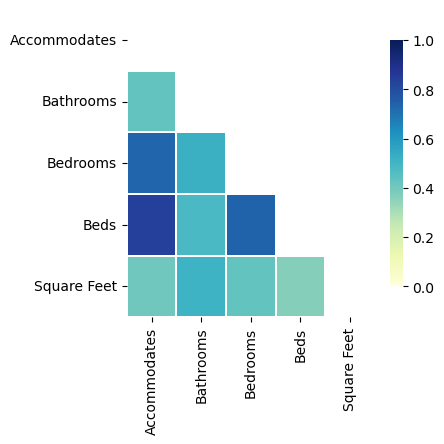

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
corr = np.abs(train[val_air].drop(['Property Type', 'Room Type', 'Bed Type', 'Amenities'], axis=1).corr())

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(4, 4))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,vmin = 0.0, vmax=1.0, center=0.5,
            linewidths=.1, cmap="YlGnBu", cbar_kws={"shrink": .8})

plt.show()

In [54]:
train[['ID']+ val_air][['ID', 'Property Type']].groupby('Property Type', dropna = False).count()

,ID
Property Type,
Apartment,8370
Bed & Breakfast,252
Boat,3
Boutique hotel,4
Bungalow,1
Camper/RV,3
Casa particular,1
Chalet,16
Condominium,252


In [56]:
train[['ID']+ val_air][['ID', 'Room Type']].groupby('Room Type', dropna = False).count()

,ID
Room Type,
Entire home/apt,6329
Private room,3872
Shared room,133


In [55]:
train[['ID']+ val_air][['ID', 'Bed Type']].groupby('Bed Type', dropna = False).count()

,ID
Bed Type,
Airbed,4
Couch,16
Futon,32
Pull-out Sofa,182
Real Bed,10100


In [90]:
train[['ID']+ val_air][['ID', 'Amenities']].groupby('Amenities', dropna = False).count()

,ID
Amenities,
"Air conditioning,Breakfast,Washer,Essentials,Hair dryer",1
"Air conditioning,Elevator in building,Heating,Family/kid friendly,First aid kit,Essentials,Hangers,translation missing: en.hosting_amenity_50",1
"Air conditioning,Heating,Essentials,translation missing: en.hosting_amenity_50",1
"Air conditioning,Heating,First aid kit,Essentials,Shampoo,translation missing: en.hosting_amenity_49,translation missing: en.hosting_amenity_50",1
"Air conditioning,Kitchen,Breakfast,Buzzer/wireless intercom,Heating,Washer,Essentials,Shampoo",1
...,...
"Wireless Internet,translation missing: en.hosting_amenity_49,translation missing: en.hosting_amenity_50",3
translation missing: en.hosting_amenity_49,1
"translation missing: en.hosting_amenity_49,translation missing: en.hosting_amenity_50",25


In [93]:
train[val_air]['Amenities'].str.split(',').explode().tolist()

['TV',
 'Internet',
 'Wireless Internet',
 'Air conditioning',
 'Kitchen',
 'Heating',
 'Washer',
 'Dryer',
 'Fire extinguisher',
 'Essentials',
 'Hangers',
 'Hair dryer',
 'Iron',
 'Laptop friendly workspace',
 'translation missing: en.hosting_amenity_49',
 'translation missing: en.hosting_amenity_50',
 'TV',
 'Internet',
 'Wireless Internet',
 'Air conditioning',
 'Kitchen',
 'Smoking allowed',
 'Heating',
 'Family/kid friendly',
 'Suitable for events',
 'Washer',
 'Dryer',
 'Smoke detector',
 'Carbon monoxide detector',
 'Essentials',
 'Shampoo',
 '24-hour check-in',
 'Hangers',
 'Hair dryer',
 'Iron',
 'Laptop friendly workspace',
 'TV',
 'Wireless Internet',
 'Kitchen',
 'Smoking allowed',
 'Pets allowed',
 'Heating',
 'Family/kid friendly',
 'Washer',
 'Essentials',
 'Shampoo',
 'TV',
 'Internet',
 'Wireless Internet',
 'Wheelchair accessible',
 'Kitchen',
 'Smoking allowed',
 'Doorman',
 'Gym',
 'Buzzer/wireless intercom',
 'Suitable for events',
 'Washer',
 'Essentials',
 'Lock

Las conclusiones tras observar los primeros estadísticos son:

* <u> **Property Type:** </u> Variable tipo string que habría que codificar. El grueso de las observaciones son Apartamentos.
* <u> **Room Type:** </u> Variable tipo string que habría que codificar. El grueso de las observaciones son Apartamentos completos.
* <u> **Accommodates:** </u> Variable de tipo numérico sin nulos que por el nombre indica el número de personas que puede alojar (acomodar) un airbnb. Mantenemos como variable de interés en el estudio del precio.
* <u> **Bathrooms:** </u> Igual que en el caso anterior, indica el número de baños que dispone el Airbnb. Habría que determinar el motivo por el cual hay airbnb's con 0 baños si por política al menos tiene que tener 1. Mantenemos como variable de interés.
* <u> **Bedrooms:** </u> Idem con el punto anterior.
* <u> **Beds:** </u> Idem con el punto anterior. El máximo de camas cuadra con el máximo de personas que pueden estar alojadas en un airbnb. Correlación alta con dicha variable.
* <u> **Bed Type:** </u> Variable tipo string que habría que codificar. Tiene sentido tener en cuenta esta variable como interés para el estudio.
* <u> **Amenities:** </u> Contiene la concatenación de todas las comodidades con las que cuenta un Airbnb. Se observan un gran número distinto de comodidades y para tenerlas todas en cuenta podríamos generar una matriz dicotómica asociada a cada airbnb o alguna variable suelta de caracter booleano si solo se quisiera tener en cuenta una comodidad en concreto. Por el momento descartamos el uso de esta variable en el estudio inicial.
* <u> **Square Feet:** </u> Variable numérica con gran cantidad de datos nulos que aportaría mucho valor a la variable dependiente. Descartamos a priori del estudio ya que tiene menos de 1/3 de información.

#### 2.4 Variables relacionadas con condiciones de alquiler del Airbnb

In [94]:
train[['Price'] + val_rent].head()

,Price,Security Deposit,Cleaning Fee,Guests Included,Extra People,Minimum Nights,Maximum Nights,Availability 30,Availability 60,Availability 90,Availability 365,Cancellation Policy,Features
13748,45.0,NaN,20.0,1,0,2,1125,4,10,34,309,moderate,"Host Is Superhost,Host Has Profile Pic,Host Id..."
9656,76.0,NaN,NaN,1,0,3,1125,6,15,30,201,strict,"Host Is Superhost,Host Has Profile Pic,Host Id..."
1379,50.0,150.0,20.0,2,10,1,1125,12,38,61,231,strict,"Host Has Profile Pic,Requires License,Instant ..."
11537,23.0,NaN,NaN,1,0,2,1125,0,0,0,0,flexible,"Host Has Profile Pic,Requires License,Instant ..."
8021,56.0,150.0,20.0,1,0,1,1125,1,3,8,80,moderate,"Host Has Profile Pic,Is Location Exact,Require..."


In [95]:
custom_descibre(train[['Price'] + val_rent])

,count,mean,std,min,25%,50%,75%,max,nulls,Corr
Price,10334,73.834817,70.928807,9.0,35.0,56.0,89.0,969.0,0,1.000000
Security Deposit,4413,188.573759,113.537267,0.0,100.0,150.0,200.0,990.0,5921,0.394731
Cleaning Fee,6153,31.497156,28.407071,0.0,15.0,25.0,40.0,500.0,4181,0.668850
Guests Included,10334,1.597736,1.181521,0.0,1.0,1.0,2.0,16.0,0,0.297826
Extra People,10334,7.582059,11.141671,0.0,0.0,0.0,15.0,276.0,0,0.108904
Minimum Nights,10334,3.069286,13.780012,1.0,1.0,2.0,3.0,1125.0,0,0.021856
Maximum Nights,10334,978.886104,10034.667728,1.0,365.0,1125.0,1125.0,1000000.0,0,0.000203
Availability 30,10334,8.924037,9.250733,0.0,0.0,6.0,14.0,30.0,0,0.112239
Availability 60,10334,23.023611,19.606504,0.0,5.0,20.0,38.0,60.0,0,0.073399
Availability 90,10334,39.915231,29.476726,0.0,12.0,38.0,65.0,90.0,0,0.040618


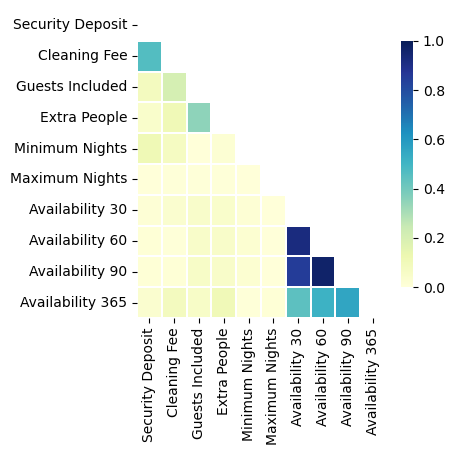

In [97]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
corr = np.abs(train[val_rent].drop(['Features', 'Cancellation Policy'], axis=1).corr())

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(4, 4))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,vmin = 0.0, vmax=1.0, center=0.5,
            linewidths=.1, cmap="YlGnBu", cbar_kws={"shrink": .8})

plt.show()

In [100]:
train[['ID']+ val_rent][['ID', 'Cancellation Policy']].groupby('Cancellation Policy', dropna = False).count()

,ID
Cancellation Policy,
flexible,3243
flexible_new,7
moderate,2985
moderate_new,14
strict,4022
strict_new,28
super_strict_30,12
super_strict_60,23


In [101]:
train[['ID']+ val_rent][['ID', 'Features']].groupby('Features', dropna = False).count()

,ID
Features,
Host Has Profile Pic,34
"Host Has Profile Pic,Host Identity Verified",55
"Host Has Profile Pic,Host Identity Verified,Instant Bookable",17
"Host Has Profile Pic,Host Identity Verified,Is Location Exact",181
"Host Has Profile Pic,Host Identity Verified,Is Location Exact,Instant Bookable",41
...,...
"Is Location Exact,Requires License",15
"Is Location Exact,Requires License,Instant Bookable",5
Requires License,10


In [102]:
train[val_rent]['Features'].str.split(',').explode().tolist()

['Host Is Superhost',
 'Host Has Profile Pic',
 'Host Identity Verified',
 'Is Location Exact',
 'Requires License',
 'Host Is Superhost',
 'Host Has Profile Pic',
 'Host Identity Verified',
 'Requires License',
 'Instant Bookable',
 'Host Has Profile Pic',
 'Requires License',
 'Instant Bookable',
 'Host Has Profile Pic',
 'Requires License',
 'Instant Bookable',
 'Host Has Profile Pic',
 'Is Location Exact',
 'Requires License',
 'Instant Bookable',
 'Host Has Profile Pic',
 'Host Identity Verified',
 'Is Location Exact',
 'Requires License',
 'Instant Bookable',
 'Host Is Superhost',
 'Host Has Profile Pic',
 'Host Identity Verified',
 'Is Location Exact',
 'Requires License',
 'Host Has Profile Pic',
 'Host Identity Verified',
 'Is Location Exact',
 'Requires License',
 'Host Is Superhost',
 'Host Has Profile Pic',
 'Host Identity Verified',
 'Is Location Exact',
 'Requires License',
 'Require Guest Profile Picture',
 'Require Guest Phone Verification',
 'Host Has Profile Pic',
 'I

Las conclusiones tras observar los primeros estadísticos son:

* <u> **Security Deposit:** </u> Variable numérica que puede tener relación con el precio. Hay que codificar los datos nulos por 0 asumiendo que los no informados es que no requieren depóstio.
* <u> **Cleaning Fee:** </u> Idem al punto anterior.
* <u> **Guests Included:** </u> Variable numérica que mantendremos y con estadísticos similares a la variable Accommodates del bloque anterior. Mantenemos por si el numero de invitados tiene correlación alta con dicha variable.
* <u> **Extra People:** </u> Variable numérica que puede tener relación con el precio. No tiene valores nulos.
* <u> **Minimum Nights:** </u> Idem con el punto anterior.
* <u> **Maximum Nights:** </u> Idem con el punto anterior.
* <u> **Availability 30:** </u> Idem con el punto anterior. Presenta correlación directa y muu positiva al ser más restrictiva frente a 60, 90 y 365.
* <u> **Availability 60:** </u> Idem con el punto anterior. Presenta correlación directa con 90 y 365
* <u> **Availability 90:** </u> Idem con 365.
* <u> **Availability 365:** </u> Solo un máximo de 90 airbnb's en nuestra muestra tiene disponibilidad superior a un año. Podemos resumir la disponibilidad en una variable dicotómica o entre si es menor de 30 y mayor de 30 para resumir estas 4 últimas variables.
* <u> **Cancellation Policy:** </u> Variable tipo string que habría que codificar.
* <u> **Features:** </u> Le pasa igual que la variable Amenities del bloque anterior. Descartamos por el momento.